# Assignment No 2 - Sean Healy

## 200016001

## https://github.com/SeanH0122/PY4SA23_Assignment

### Part 1: Python Basics

#### Task 1

In [2]:
# If... Else statement to test if a number is divisible by 3

# Prompt
num = int(input("Enter a number: "))

# Check
if num % 3 == 0:
    print(num, "is divisible by 3")
else:
    print(num, "is not divisible by 3")

Enter a number: 3
3 is divisible by 3


#### Task 2

In [4]:
# If... Else statement to test a string in a list

# Define
acceptable_fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]

# Prompt
fruit = input("Enter a fruit: ")

#Check
if fruit.lower() in acceptable_fruits:
    print(fruit.upper(), "is acceptable")
else:
    print(fruit.upper(), "is not acceptable.")

Enter a fruit: Apple
APPLE is acceptable


In [5]:
#Import
from math import radians, sin, cos, sqrt, atan2

#Define
def haversine_distance(coord1, coord2):
    #Mean radius of Earth in km
    R = 6371.0
    
    #Convert lat/long to radians
    lat1,lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    
    # Calculate the difference between the two latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the haversine of half the difference in latitude and longitude
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2

    # Calculate the central angle using the arctangent function
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    # Calculate the distance using the Haversine formula
    d = R * c

    return d

# Coordinates of Uni of St. Andrews
standrews = [56.3394, -2.7962]

#Coordinates of Edinburgh Uni
edinburgh = [55.9441, -3.1875]

#Calculate distance between Uni of St. Andrews and Edinburgh Uni with Haversine Function
distance = haversine_distance(standrews, edinburgh)

print(f"The distance between the Uni of St. Andrews and Edinburgh Uni is {distance: .2f} km.")

The distance between the Uni of St. Andrews and Edinburgh Uni is  50.20 km.


### Part 2: Pandas and NumPy

#### Question 1: How many trees are of the Quercus or Acer genus? 

In [6]:
import pandas as pandas

# Define file path 
portland_park_trees = '/Users/seanhealy/Desktop/PY4SA23_Assignment/Assignment_2_Data/portland_park_trees.csv'

# Read file
trees = pandas.read_csv(portland_park_trees)

# Filter for rows of Quercus or Acer genus
quercus_or_acer = trees[(trees['Genus'] == 'Quercus') | (trees['Genus'] == 'Acer')]

# Number of rows
num_trees = len(quercus_or_acer)

print(f"There are {num_trees} trees of the Quercus or Acer genus in the Portland parks.")

There are 5675 trees of the Quercus or Acer genus in the Portland parks.


#### Question 2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [7]:
# Filter for Quercus or Acer genus with DBH > 50 inches
quercus_or_acer_dbh_50 = quercus_or_acer[quercus_or_acer['DBH'] > 50]

# Number of rows
num_trees = len(quercus_or_acer_dbh_50)

print(f"There are {num_trees} trees of the Quercus or Acer genus with a DBH larger than 50 inches.")

There are 124 trees of the Quercus or Acer genus with a DBH larger than 50 inches.


#### Question 3:  Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [8]:
# Filter for Quercus, Acer, and Fraxinus genus
qaf_trees = trees[trees['Genus'].isin(['Quercus', 'Acer', 'Fraxinus'])]

# Calculate the mean DBH for each group
mean_dbh = qaf_trees.groupby('Genus')['DBH'].mean()

# Calculate the highest mean
highest_mean = mean_dbh.idxmax()

print(f"The genus with the highest mean DBH is {highest_mean}.")

The genus with the highest mean DBH is Quercus.


#### Question 4: How many different species of trees are recorded in the Acer genus? 

In [9]:
# Filter for Acer genus
acer_trees = trees[trees['Genus'] == 'Acer']

# Count unique species
num_species = len(acer_trees['Species'].unique())

print(f"There are {num_species} different species of trees in the Acer genus.")

There are 20 different species of trees in the Acer genus.


#### Question 5


In [10]:
# Define file path
world_cities = '/Users/seanhealy/Desktop/PY4SA23_Assignment/Assignment_2_Data/world_cities.csv'

# Read file
cities = pandas.read_csv(world_cities)

# New column that displays population in millions
cities['pop_M'] = cities['pop']/1000000

# Remove the original 'pop' column
del cities['pop']

# Filtering data to cities that being with 'S'
cities_s = cities.loc[cities['city'].str.startswith('S')]

# Selecting a city that begins with 'S'
my_city = cities_s.iloc[2]['city']
print(my_city)

Sa Kaeo


In [11]:
# Find the country where Sa Kaeo is located
country = cities.loc[cities['city'] == 'Sa Kaeo', 'country'].iloc[0]

# Subset the cities in that country
cities_in_country = cities.loc[cities['country'] == country]

# Sort the cities by population size
largest_cities = cities_in_country.sort_values('pop_M', ascending = False)[:5]

print(largest_cities)

               city   country    lat     lon  capital     pop_M
3225        Bangkok  Thailand  13.73  100.50        1  4.935988
26259    Nonthaburi  Thailand  13.80  100.18        0  0.391245
32665  Samut Prakan  Thailand  13.61  100.61        0  0.390744
39376    Udon Thani  Thailand  17.41  102.79        0  0.251672
7585      Chon Buri  Thailand  13.40  101.00        0  0.224441


### Part 3: Python Data Visualisation

#### Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis

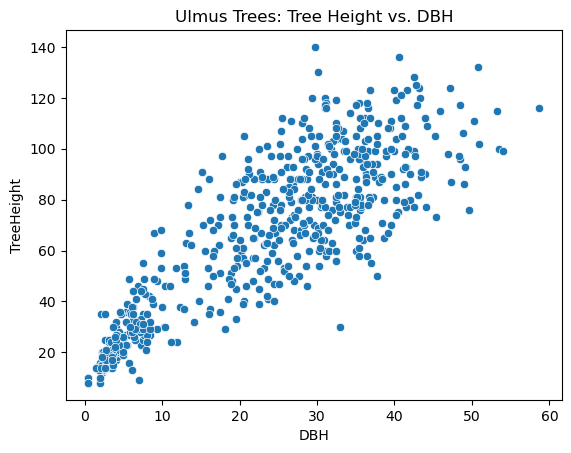

In [13]:
import matplotlib.pyplot as pyplot
import seaborn as seaborn

# Filter the data for trees in the Ulmus genus
ulmus_trees = trees[trees['Genus'] == 'Ulmus']

# Plotting the data 
seaborn.scatterplot(data = ulmus_trees, x = 'DBH', y = 'TreeHeight')
pyplot.title('Ulmus Trees: Tree Height vs. DBH')
pyplot.show()

#### Graph 2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue

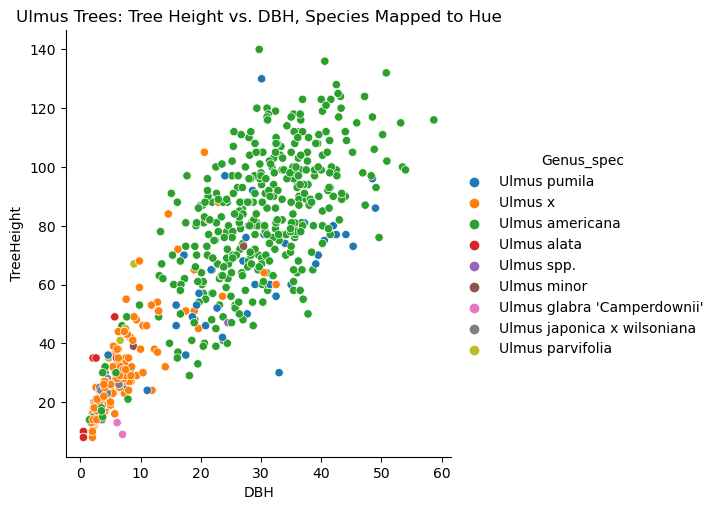

In [14]:
# Plotting the data
ulmus_hue = seaborn.relplot(x = "DBH", y = "TreeHeight", hue = "Genus_spec", data = ulmus_trees)
pyplot.title('Ulmus Trees: Tree Height vs. DBH, Species Mapped to Hue')
pyplot.show()

#### Graph 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species

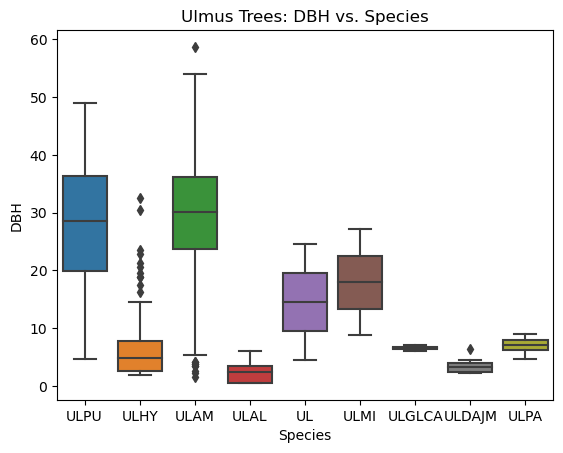

In [15]:
# Plotting the data - 'Species' used instead of 'Genus_spec' for x axis clarity
ulmus_species = seaborn.boxplot(data = ulmus_trees, x = 'Species', y = 'DBH')
pyplot.title('Ulmus Trees: DBH vs. Species')
pyplot.show()

#### Graph 4: Combine Graphs 1 and 3 into a single figure. 

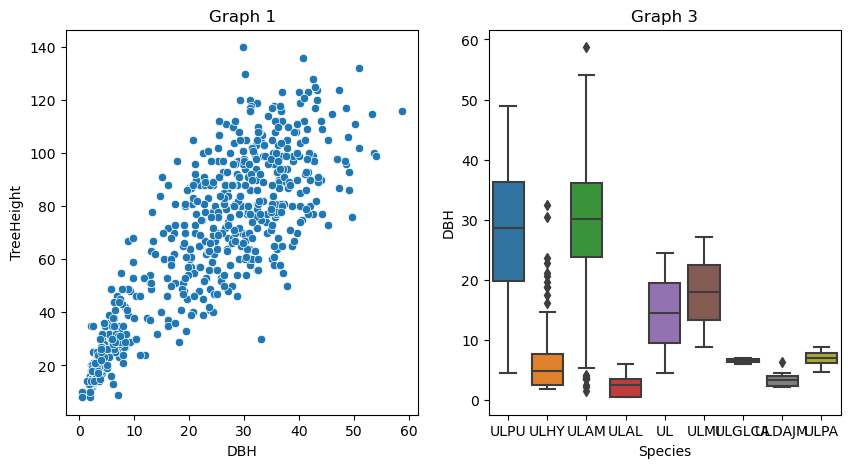

In [17]:
# Set up figure and gridspec
graph4 = pyplot.figure(figsize = (10, 5))
gridspec = graph4.add_gridspec(1, 2)

# Add scatter plot to first subplot
ax1 = graph4.add_subplot(gridspec[0, 0])
seaborn.scatterplot(data = ulmus_trees, x = 'DBH', y = 'TreeHeight', ax = ax1)
ax1.set_title('Graph 1')

# Add box plot to second subplot
ax2 = graph4.add_subplot(gridspec[0, 1])
seaborn.boxplot(data = ulmus_trees, x = 'Species', y = 'DBH', ax = ax2)
ax2.set_title('Graph 3')

# Show the figure
pyplot.show()

### Part 4: Python GeoPandas

#### Task 1: Read the selected dataset as GeoPandas DataFrame

In [24]:
# Import geopandas
import geopandas as geopandas

#Define filepath
community_councils_path = "/Users/seanhealy/Desktop/PY4SA23_Assignment/Assignment_2_Data/Community_Councils/Community_Councils.shp"

#Read file with geopandas
community_councils = geopandas.read_file(community_councils_path)

#See the data
community_councils.head()

,FID,NAME,CC_NUMBER,URL,STATUS,Shape__Are,Shape__Len,geometry
0,1,Methven,34,https://www.pkc.gov.uk/communitycouncilcontacts,Active,1.805379e+08,86454.283076,"POLYGON ((297520.109 734730.168, 297530.894 73..."
1,2,Earn,42,https://www.pkc.gov.uk/communitycouncilcontacts,Active,1.191384e+08,78932.807995,"POLYGON ((301278.572 717605.559, 301299.711 71..."
2,3,Tulloch,2,https://www.pkc.gov.uk/communitycouncilcontacts,Not Active,2.760765e+06,9063.388880,"POLYGON ((309746.689 726615.243, 310011.284 72..."
3,4,City South,3,https://www.pkc.gov.uk/communitycouncilcontacts,Not Active,7.349176e+06,13130.574808,"POLYGON ((309542.998 724163.900, 309791.504 72..."
4,5,Letham,7,https://www.pkc.gov.uk/communitycouncilcontacts,Not Active,1.855091e+06,7945.983063,"POLYGON ((310770.704 724468.902, 310873.461 72..."


#### Task 2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

<AxesSubplot: >

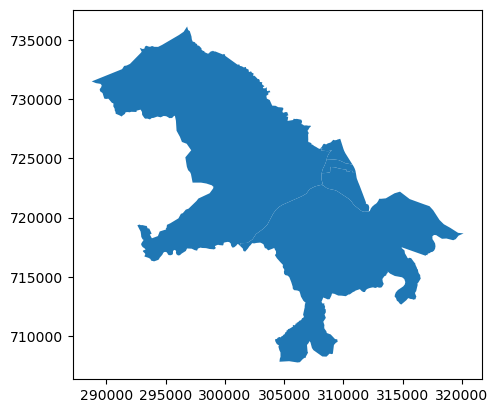

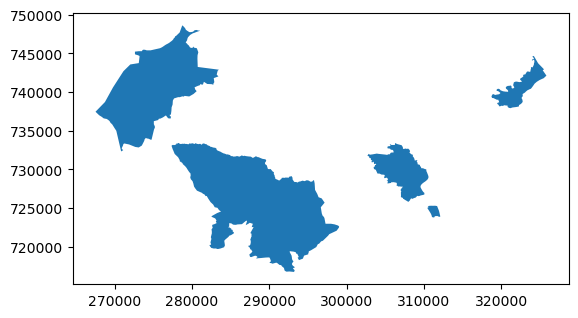

In [22]:
# Plotting the first 5 sets of records
community_councils.head(5).plot()

# Plotting the last 5 sets of records
community_councils.tail(5).plot()

#### Task 3: Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

In [25]:
#Creating the map, ToolTip automatically included due to GeoPandas
community_councils.explore(column='NAME', cmap='RdYlBu')

#### Task 4: What is the Coordinate Reference System of the selected dataset?

In [29]:
#Finding the CRS
community_councils.crs
print('The CRS of the selected dataset is:',community_councils.crs)

The CRS of the selected dataset is: EPSG:27700


#### Task 5: How many features does the selected dataset contain?

In [30]:
#Finding the number of features
len(community_councils)

52

#### Task 6: Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [44]:
#Dataframe that only shows councils that are currently 'Active'
categorical_subset = community_councils[community_councils['STATUS'] == 'Active']
categorical_subset

,FID,NAME,CC_NUMBER,URL,STATUS,Shape__Are,Shape__Len,geometry
0,1,Methven,34,https://www.pkc.gov.uk/communitycouncilcontacts,Active,1.805379e+08,86454.283076,"POLYGON ((297520.109 734730.168, 297530.894 73..."
1,2,Earn,42,https://www.pkc.gov.uk/communitycouncilcontacts,Active,1.191384e+08,78932.807995,"POLYGON ((301278.572 717605.559, 301299.711 71..."
5,6,North Muirton,8,https://www.pkc.gov.uk/communitycouncilcontacts,Active,1.712744e+06,7039.838291,"POLYGON ((310601.342 725041.595, 310600.351 72..."
6,7,Scone and District,39,https://www.pkc.gov.uk/communitycouncilcontacts,Active,2.831173e+07,29620.343124,"POLYGON ((311132.000 730643.437, 311319.781 73..."
7,8,"Bridgend, Gannochy and Kinnoull",5,https://www.pkc.gov.uk/communitycouncilcontacts,Active,4.710432e+06,10575.710860,"POLYGON ((313178.160 725255.990, 313258.900 72..."
9,10,West Carse,44,https://www.pkc.gov.uk/communitycouncilcontacts,Active,3.269980e+07,32354.401227,"POLYGON ((317417.139 724827.344, 318346.031 72..."
10,11,Comrie and District,25,https://www.pkc.gov.uk/communitycouncilcontacts,Active,2.778577e+08,90905.270818,"POLYGON ((274379.000 733958.500, 274433.000 73..."
11,12,Muthill and Tullibardine,30,https://www.pkc.gov.uk/communitycouncilcontacts,Active,8.219623e+07,46118.552461,"POLYGON ((284987.801 720564.062, 285036.551 72..."
12,13,Crieff,23,https://www.pkc.gov.uk/communitycouncilcontacts,Active,7.273364e+06,14206.736328,"POLYGON ((287103.895 723230.000, 286947.270 72..."
13,14,Auchterarder and District,27,https://www.pkc.gov.uk/communitycouncilcontacts,Active,1.100326e+08,62570.189421,"POLYGON ((299005.151 717320.900, 299061.690 71..."


#### Task 7: Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [43]:
#Dataframe that only shows councils that have a Shape length greater than 100000
numerical_subset = community_councils.query("Shape__Len > 100000")
numerical_subset

,FID,NAME,CC_NUMBER,URL,STATUS,Shape__Are,Shape__Len,geometry
15,16,Rannoch,11,https://www.pkc.gov.uk/communitycouncilcontacts,Not Active,6.293710e+08,134287.121256,"POLYGON ((275300.444 759535.892, 275443.001 75..."
16,17,Glenlyon and Loch Tay,14,https://www.pkc.gov.uk/communitycouncilcontacts,Active,4.542106e+08,133795.571749,"POLYGON ((273180.238 744322.542, 273109.123 74..."
18,19,Blair Atholl and Struan,10,https://www.pkc.gov.uk/communitycouncilcontacts,Active,6.728645e+08,157373.540912,"POLYGON ((282248.750 785598.188, 282237.750 78..."
25,26,Dunkeld and Birnam,32,https://www.pkc.gov.uk/communitycouncilcontacts,Active,3.259601e+08,109263.274258,"POLYGON ((303974.500 753415.000, 304197.688 75..."
28,29,Mount Blair,18,https://www.pkc.gov.uk/communitycouncilcontacts,Active,4.534623e+08,134367.549631,"POLYGON ((318538.875 758374.812, 318500.688 75..."


#### Task 8: Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

Text(81.47222222222221, 0.5, 'Y Coordinates')

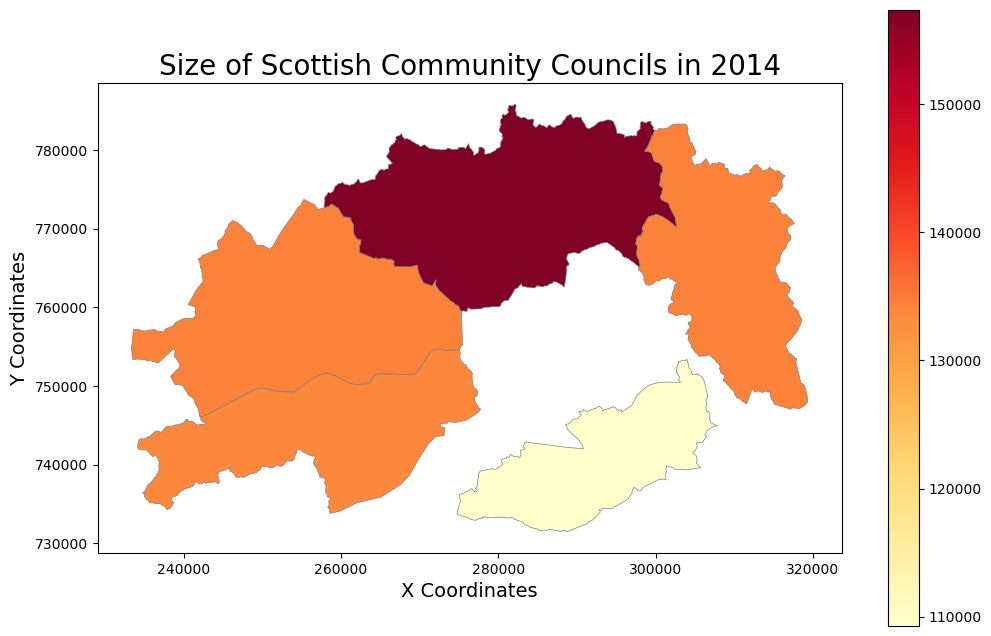

In [55]:
fig, ax = pyplot.subplots(figsize=(12,8))
numerical_subset.plot(column='Shape__Len', cmap='YlOrRd', linewidth=0.5, edgecolor='0.5', legend=True, ax=ax)
ax.set_title('Size of Scottish Community Councils in 2014', fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.set_xlabel('X Coordinates', fontdict={'fontsize': '14'})
ax.set_ylabel('Y Coordinates', fontdict={'fontsize': '14'})